In [55]:
!pip install statsmodels

# Bike Sharing Data and Graphing

Using Bike Sharing Data, this project was meant as an exploration into data (EDA) and graphing. 

This project familiarized me with: 

- Reading plaintext delimited data into Pandas
- Data wrangling
- EDA
- Plotting

In [1]:
# Run this cell to set up your notebook.  Make sure ds100_utils.py is in this assignment's folder
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path


# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

# Loading

In [9]:
zipped_data = zipfile.ZipFile("data.zip", 'r')

data_dir = Path('data')
zipped_data.extractall(data_dir)

print("Extracted Files:")
for f in data_dir.glob("*"):
    print("\t",f)

Extracted Files:
	 data\bikeshare.txt


In [11]:
print("Size:", (data_dir/"bikeshare.txt").stat().st_size, "bytes")

Size: 1156736 bytes


In [24]:
bike = pd.read_csv(data_dir/'bikeshare.txt')
print(bike.shape)
bike.head()


(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [25]:
bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Data Preparation

So the data set is completely numeric. For graphing purposes, it is useful to replace the numeric values with strings. This way, graphs can have proper labeling. 

Here data was replaced as follows:

- holiday: Converted to yes and no. 
- weekday: Changed the 'weekday' column to use the 3-letter label ('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', and 'Sat' ...) instead of its current numerical values. 
- workingday: Changed to yes and no.
- weathersit: Replaced each value with one of Clear, Mist, Light, or Heavy.


In [26]:
bike = bike.replace({'holiday': {0: 'no', 1 : 'yes'},
                     "weekday":{0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri',6:'Sat'}, 
                     "workingday":{0: 'no', 1 : 'yes'}, 
                     "weathersit":{0:'Clear', 1:'Mist', 2:'Light', 3:'Heavy'}
    
                    })

In [27]:
#number of holidays in dataset
num_holidays = sum(bike['holiday'] == 'yes')


The dataset is currently measured at the hourly level. In order to compute daily statistics more easily, a new data frame was created here to separate casual, wregistered and working day rider classes into another dataframe. 

In [30]:
daily_counts = bike.groupby('dteday').agg({'casual':sum, 'registered': sum, 'workingday': 'first'})
daily_counts

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes
...,...,...,...
2012-12-27,247,1867,yes
2012-12-28,644,2451,yes
2012-12-29,159,1182,no


# Investigating Rider Distribution

Here, a histogram of the data was created with the sns plot package in order to get an idea of the rider distribution. 

For casual riders, the density is highly dense from 0 to 2000 riders. For registered riders, the population is normally distributed between 0 and about 6000 riders. The casual population distribution does not have a clear median, has two distignishible peaks/maximas, not symmetrical, and right/postiviely skewed. The registered riders are evenly distributed over 0 to about 6000 riders and symetrical looking. It has a clear maxima, evenly skewed/tailed and has no distinguishable gaps and outliers.


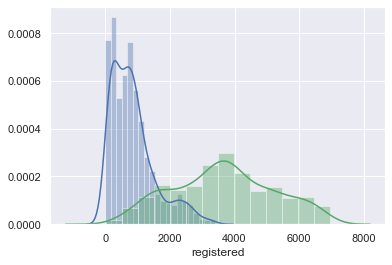

In [33]:
x = sns.distplot(daily_counts['casual'], kde=True, rug=False, color = 'b', label = 'casual' )
y = sns.distplot(daily_counts['registered'], kde=True, rug=False, color='g', label = 'registered')


print_out ="For casual riders, the density is highly dense from 0 to 2000 riders. For registered riders, the population is normally distributed between 0 and about 6000 riders. The casual population distribution does not have a clear median, has two distignishible peaks/maximas, not symmetrical, and right/postiviely skewed. The registered riders are evenly distributed over 0 to about 6000 riders and symetrical looking. It has a clear maxima, evenly skewed/tailed and has no distinguishable gaps and outliers."  
print(print_out)

Now a Density plot with sns.lmplot

Weekday fitted blue line slopes in the direction of of casual riders. Working day orange colored fitted line slopes more in the direction of of registered riders compared to the weekend blue line. This implies that weekend riders tend to be more casual compared to weekday riders who tend to be more resgistered. It may be hard to individually distingish a datapoint/rider within the data due to overlapping of other data points. This can hide individuals due to overplotting/overlap


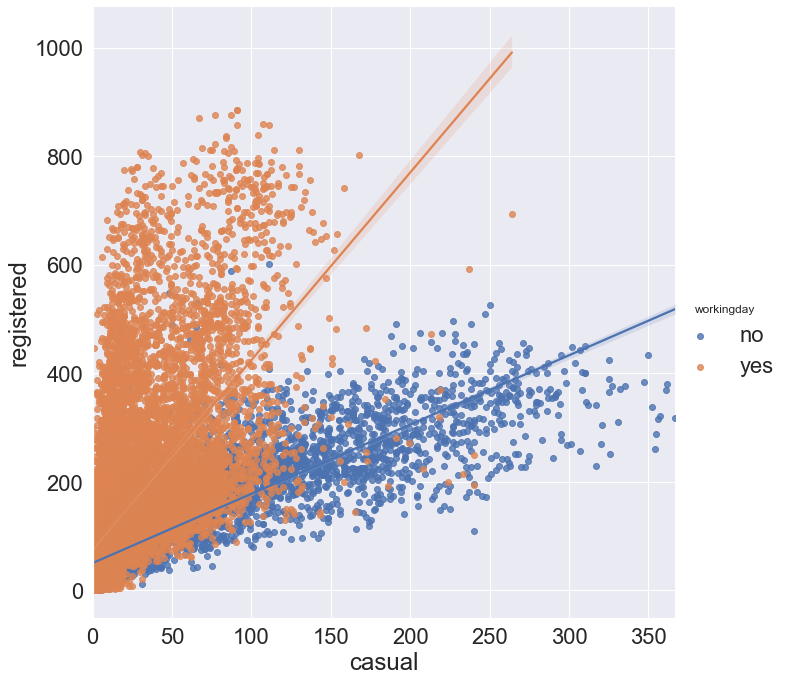

In [36]:
# Make the font size a bit bigger
sns.set(font_scale=2)
sns.lmplot(x="casual", y="registered", data =bike , fit_reg=True, hue="workingday", height=10)
#plt.axis([0,400, 0, 1600])


print_out = "Weekday fitted blue line slopes in the direction of of casual riders. Working day orange colored fitted line slopes more in the direction of of registered riders compared to the weekend blue line. This implies that weekend riders tend to be more casual compared to weekday riders who tend to be more resgistered. It may be hard to individually distingish a datapoint/rider within the data due to overlapping of other data points. This can hide individuals due to overplotting/overlap" 

print(print_out)

# Visualization

Work days and non-work days are clearly visulizated with the histograms and density plot. However, overplotting makes it unclear the density of joint counts. 


Here is a basic density plot with with both weekend and weekday data:

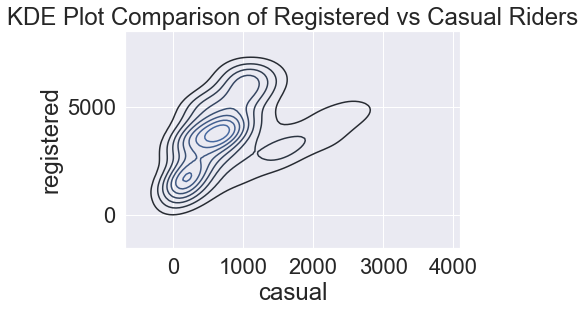

In [38]:
sns.kdeplot(daily_counts['casual'], daily_counts['registered'])
plt.title('KDE Plot Comparison of Registered vs Casual Riders');

In [39]:
Here, two bivariate kernel density estimates (sns.kdeplot) is used to address the overlapping:

SyntaxError: invalid syntax (<ipython-input-39-e62780564bea>, line 1)

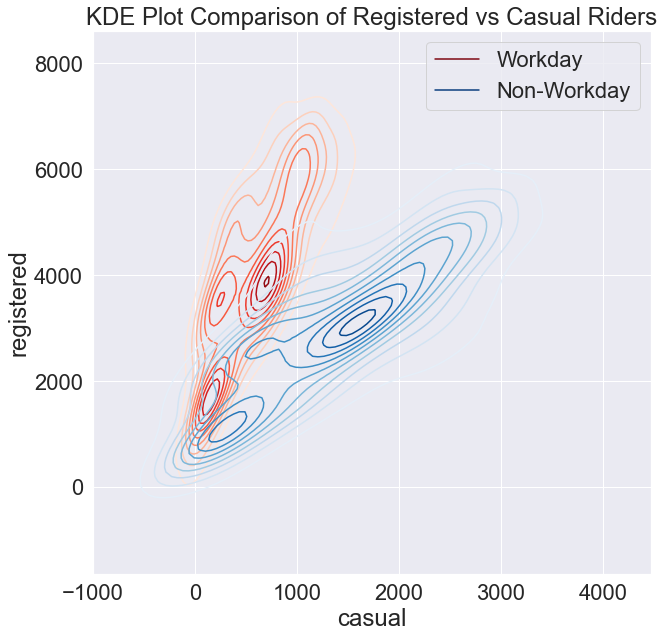

In [40]:
import matplotlib.patches as mpatches  # see the tutorial for how we use mpatches to generate this figure!
plt.figure(figsize=(10, 10))
# Set 'is_workingday' to a boolean array that is true for all working_days
is_workingday = daily_counts['workingday'] == 'yes'

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on weekdays
# Hint: use loc and is_workingday to splice out the relevant rows and column (casual/registered). 
casual_weekday = daily_counts.loc[is_workingday, 'casual']
registered_weekday = daily_counts.loc[is_workingday, 'registered']


sns.kdeplot(casual_weekday, registered_weekday, cmap="Reds", label='Workday')
plt.title('KDE Plot Comparison of Registered vs Casual Riders');
# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides

# Repeat the same steps above but for rows corresponding to non-workingdays
casual_weekend = daily_counts.loc[~is_workingday, 'casual']
registered_weekend = daily_counts.loc[~ is_workingday, 'registered']

sns.kdeplot(casual_weekend, registered_weekend, cmap="Blues", label="Non-Workday")
# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides
plt.legend()

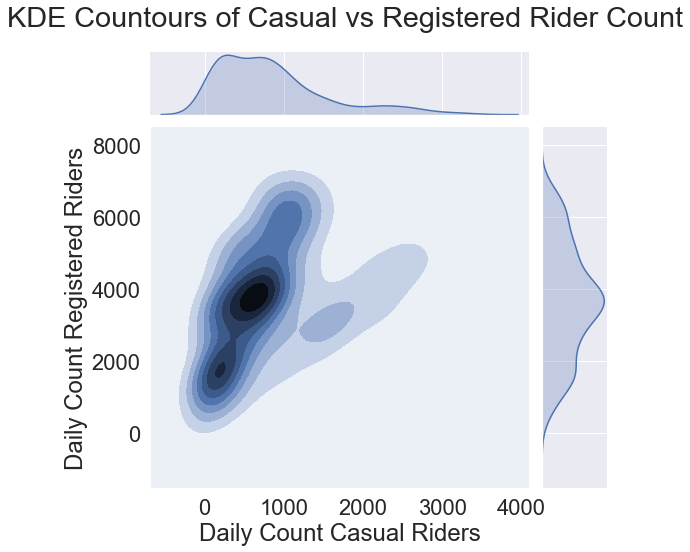

In [43]:
h = sns.jointplot(x='casual', y='registered', data=daily_counts, kind="kde", height = 8)
#plt.axis([0,4000, 0, 0.0008]
h.set_axis_labels("Daily Count Casual Riders", "Daily Count Registered Riders")
plt.suptitle('KDE Countours of Casual vs Registered Rider Count')
plt.subplots_adjust(top=0.9)

In [44]:
print_out = "This countour plot suggests where there is similar clustering/overlapping of casual and registered counts. The graph in 2c did had overlapping and overplotting issues. Here, point overlapping and clustering is represented by cotours and the density it represents. For workdays the plot suggests a dense clustring of causal and registered data points of about 800 casual and 4000 registered riders and a large cluster of about 2000 registered riders. For non-workdays, there are two main clusters again, this time at about 1000 registered and 100 casual riders and about 3000 registered and 1800 casual riders. The clustering relationship is easier to see on this countour plot due to density of points being represented by the countours and thier 3rd Demensional hieght."

print(print_out)

This countour plot suggests where there is similar clustering/overlapping of casual and registered counts. The graph in 2c did had overlapping and overplotting issues. Here, point overlapping and clustering is represented by cotours and the density it represents. For workdays the plot suggests a dense clustring of causal and registered data points of about 800 casual and 4000 registered riders and a large cluster of about 2000 registered riders. For non-workdays, there are two main clusters again, this time at about 1000 registered and 100 casual riders and about 3000 registered and 1800 casual riders. The clustering relationship is easier to see on this countour plot due to density of points being represented by the countours and thier 3rd Demensional hieght.


# Ride Sharing and Time

In [45]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Mist,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Mist,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Mist,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Mist,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Mist,0.24,0.2879,0.75,0.0,0,1,1


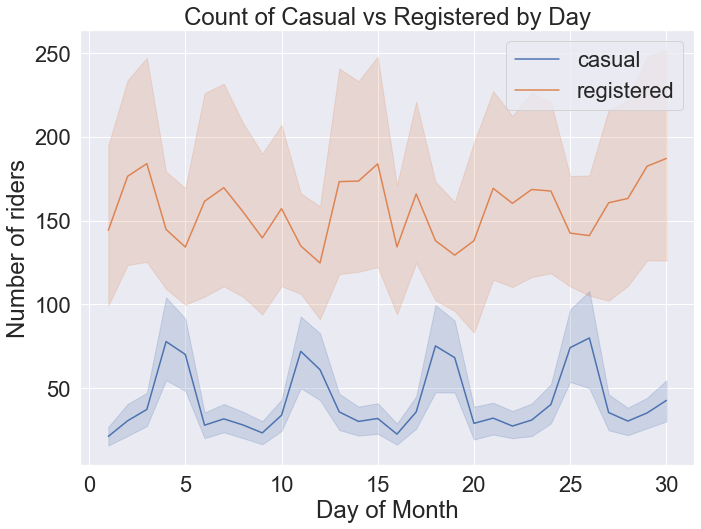

In [46]:
plt.figure(figsize=(11, 8))
extract = bike[(bike['yr'] == 0) & (bike['mnth'] == 6)].copy()
extract['day'] = extract['dteday'].str[8:].map(int)

sns.lineplot(extract['day'], extract['casual'], label ='casual')
sns.lineplot(extract['day'], extract['registered'], label = 'registered')
plt.title("Count of Casual vs Registered by Day")
plt.xlabel("Day of Month")
plt.ylabel("Number of riders")
plt.legend(loc = 1)

In [47]:
print_out = "For Casual riders, there seems to be a repetitive peak in amplitude every 7 days. Looking at historical calendar of June 2011, weekends occur at [4,5,11,12,18,19,25,26]. These numbers match the peaks on the blue casual rider graph. With a small confidence interval, this suggests that casual riders strongly prefer weekends to ride.Registered riders data seems more nosiy compared to casual rider line, however 4 of the 5 global minima correspond to casual's weekend peaks. With a large confidence interval, this implies that registered riders somewhat do not prefer weekends and generally prefer weekdays instead. The wide confidnece interval may be largetr for registered riders due to thier unpridictable behavior. Casual riders tend to ride only on weekends while registered riders tend to ride both on weekends and weekdays. The wider confidence interval for registered riders is due to thier unpredictabliity due to their varied behavior in comparison to predictable casual weekend riders."
print(print_out)

For Casual riders, there seems to be a repetitive peak in amplitude every 7 days. Looking at historical calendar of June 2011, weekends occur at [4,5,11,12,18,19,25,26]. These numbers match the peaks on the blue casual rider graph. With a small confidence interval, this suggests that casual riders strongly prefer weekends to ride.Registered riders data seems more nosiy compared to casual rider line, however 4 of the 5 global minima correspond to casual's weekend peaks. With a large confidence interval, this implies that registered riders somewhat do not prefer weekends and generally prefer weekdays instead. The wide confidnece interval may be largetr for registered riders due to thier unpridictable behavior. Casual riders tend to ride only on weekends while registered riders tend to ride both on weekends and weekdays. The wider confidence interval for registered riders is due to thier unpredictabliity due to their varied behavior in comparison to predictable casual weekend riders.


# Daily Patterns

Text(0, 0.5, 'Average Count')

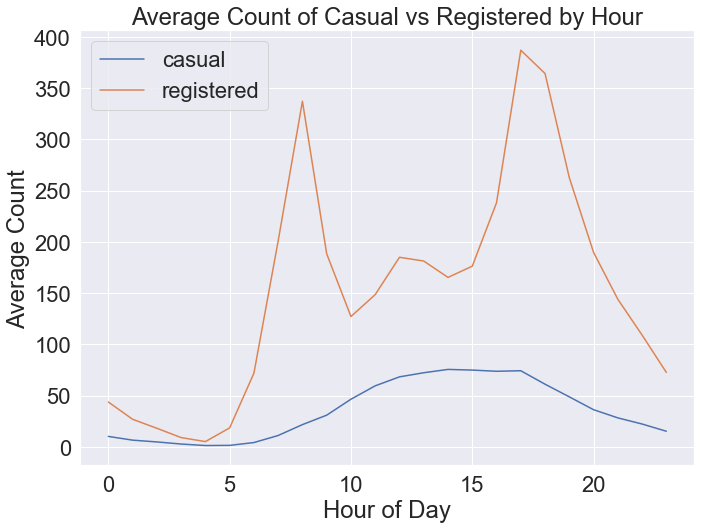

In [48]:
plt.figure(figsize=(11, 8))
x = bike.groupby('hr').agg({'casual':'mean'}).copy()
y = bike.groupby('hr').agg({'registered':'mean'}).copy()
#x.insert(0, 'hr', range(1,25))
sns.lineplot(bike['hr'], x['casual'], label = 'casual')
sns.lineplot(bike['hr'], y['registered'], label = 'registered')
plt.legend(loc = 2)
plt.title("Average Count of Casual vs Registered by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Count")

In [49]:

print_out = "For Registered riders there is a peak at abotu 7am and 5pm, this is where riders commute back and forth from work. Causal riders tend to ride from 10 to 16 or 10am to 4pm. This makes sense as it is not to early in the day and optimal sunlight."
print(print_out)

For Registered riders there is a peak at abotu 7am and 5pm, this is where riders commute back and forth from work. Causal riders tend to ride from 10 to 16 or 10am to 4pm. This makes sense as it is not to early in the day and optimal sunlight.


# Ride Sharing and Weather Correlation

In [51]:
#creating a new column
bike['prop_casual'] = bike['casual']/bike['cnt']


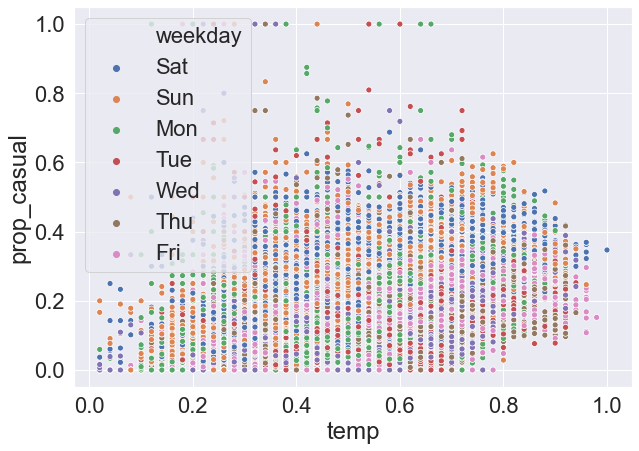

In [52]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x="temp", y="prop_casual", hue="weekday");

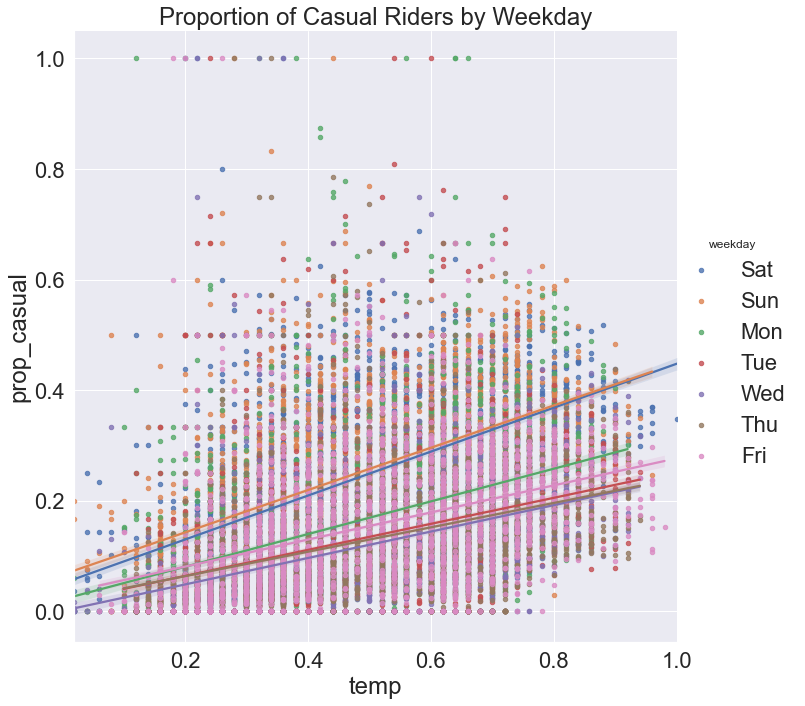

In [53]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

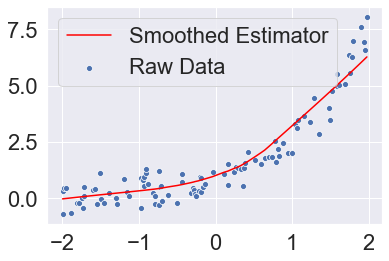

In [56]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(xobs, yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(xobs, ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

The proportion of casual riders to bike rider count generally increases as temperature increases. However on weekends noticeably, although shown in previous graph in 4 that casual rider population peaks on weekends, the slope of the weekend lines decrease after 20 degrees celcius.


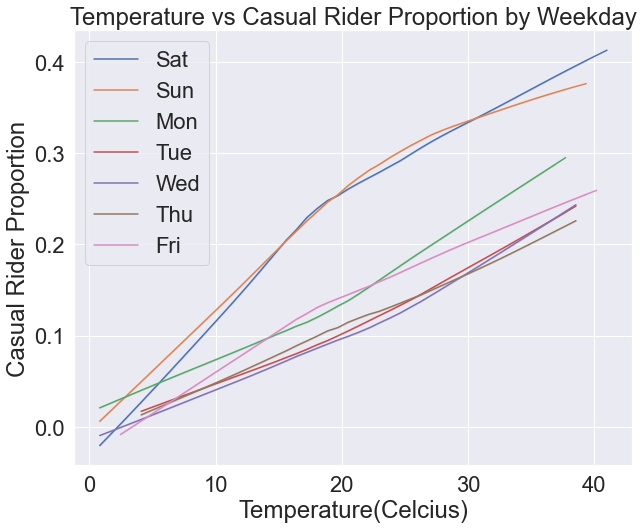

In [58]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(10,8))
# Predict 'smoothed' valued for observations
#"weekday":{0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri',6:'Sat'}
#for i in range:


for i in bike['weekday'].unique():
# Predict 'smoothed' valued for observations
    ysmooth = lowess(bike[bike['weekday']==i]['prop_casual'], bike[bike['weekday']==i]['temp']*41, return_sorted=False)
    sns.lineplot(bike[bike['weekday']==i]['temp']*41, ysmooth, label=i)
    plt.legend();
    
plt.title("Temperature vs Casual Rider Proportion by Weekday")
plt.xlabel("Temperature(Celcius)")
plt.ylabel("Casual Rider Proportion")


print_out = "The proportion of casual riders to bike rider count generally increases as temperature increases. However on weekends noticeably, although shown in previous graph in 4 that casual rider population peaks on weekends, the slope of the weekend lines decrease after 20 degrees celcius."
print(print_out)
